In [1]:
import cv2
import os
import csv
import matplotlib.pyplot as plt

HOME = os.getcwd()
IMG_FOLDER = os.path.join(HOME,"DropletPNGS")
IMG_PATH = os.path.join(IMG_FOLDER,"30_30_1.png")
print(HOME, IMG_PATH, IMG_FOLDER)


C:\Users\Dynames\School\LabWork\SAM-Microfluidics C:\Users\Dynames\School\LabWork\SAM-Microfluidics\DropletPNGS\30_30_1.png C:\Users\Dynames\School\LabWork\SAM-Microfluidics\DropletPNGS


In [2]:
def crop_to_box(img, coords):
    [x,y,w,h] = coords
    cropped_img = img[x:(x+w),y:(y+h)]
    return cropped_img

In [3]:
raw_img = cv2.imread(IMG_PATH)
coords = []
with open("results.csv","r") as csv_file:
    read = csv.DictReader(csv_file)
    for row in read:
        x = int(row["x"])
        y = int(row["y"])
        w = int(row["w"])
        h = int(row["h"])
        coords.append([x,y,w,h])
        print(f"{x}, {y}, {w}, {h}")

880, 108, 101, 118
989, 113, 94, 95
21, 92, 93, 93
1089, 500, 89, 91
122, 685, 92, 89
454, 95, 87, 92
1070, 405, 91, 90
970, 707, 90, 87
1253, 459, 91, 89
581, 192, 86, 92
601, 452, 87, 90
417, 382, 89, 90
817, 711, 87, 93
580, 609, 85, 91
673, 616, 89, 91
729, 978, 87, 89
487, 924, 86, 89
1141, 769, 88, 89
1132, 341, 90, 90
834, 404, 86, 89
519, 264, 87, 87
34, 660, 91, 86
934, 529, 87, 88
260, 393, 90, 82
787, 889, 81, 90
1002, 465, 87, 86
1242, 369, 86, 85
800, 94, 89, 85
669, 355, 84, 87
938, 939, 82, 90
1110, 967, 87, 85
1087, 174, 85, 84
46, 995, 86, 82
347, 447, 87, 85
313, 42, 83, 87
700, 68, 88, 87
316, 751, 86, 85
513, 435, 82, 86
578, 364, 82, 86
859, 24, 82, 88
944, 281, 86, 85
734, 153, 85, 85
731, 819, 88, 84
851, 499, 82, 87
623, 696, 83, 86
1184, 516, 85, 85
221, 181, 87, 83
112, 129, 82, 85
301, 902, 83, 83
210, 656, 82, 86
1287, 748, 84, 85
69, 208, 84, 83
340, 347, 84, 84
1064, 724, 82, 83
495, 776, 82, 84
405, 770, 82, 85
182, 796, 82, 84
1151, 595, 80, 81
29, 805, 

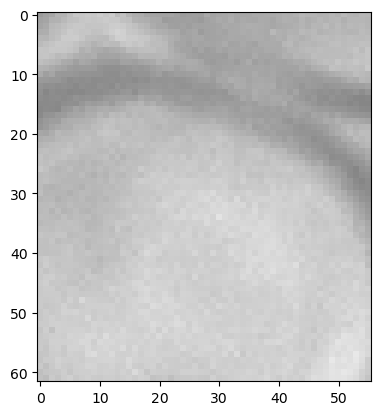

In [8]:
crop_img = crop_to_box(raw_img,coords[203])
# print(crop_img)
plt.imshow(crop_img)
plt.show()

array([[[ 97,  97,  97],
        [ 98,  98,  98],
        [105, 105, 105],
        [112, 112, 112]]], dtype=uint8)